# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [27]:
import pandas as pd
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',60)

---
## 2. Load data

In [42]:
df = pd.read_csv('client_data.csv',index_col=0)
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [43]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [44]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [45]:
diff

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001
...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,-0.050232,-0.335085
16092,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,0.177779
16093,fffc0cacd305dd51f316424bbb08d1bd,-0.001760,0.164916
16094,fffe4f5646aa39c7f97f95ae2679ce64,-0.009391,0.162916


Average price changes across periods
We can now enhance the feature that our colleague made by calculating the average price changes across individual periods, instead of the entire year.

In [46]:
price_df

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [47]:
df

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
id,,,,,,,,,,,,,,,,,,,,,,,,,
24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1


In [48]:
df= pd.merge(df,price_df,on='id')

In [49]:
df= pd.merge(df,diff,on='id')

In [50]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001


In [51]:
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()


In [52]:
mean_prices

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [53]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [54]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925


In [55]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1

This feature may be useful because it adds more granularity to the existing feature that my colleague found to be useful. Instead of looking at differences across an entire year, we have now created features that look at mean average price differences across different time periods (off_peak, peak, mid_peak). The dec-jan feature may reveal macro patterns that occur over an entire year, whereas inter-time-period features may reveal patterns on a micro scale between months.

In [ ]:
#extra features 

In [56]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1

In [115]:
date1 = df.groupby('id')[['date_end','date_activ']].aggregate({'date_end':'max','date_activ':'min'}).reset_index()
date1

,id,date_end,date_activ
0,0002203ffbb812588b632b9e628cc38d,2016-02-21,2010-01-19
1,0004351ebdd665e6ee664792efc4fd13,2016-06-21,2009-08-06
2,0010bcc39e42b3c2131ed2ce55246e3c,2016-05-05,2013-02-25
3,00114d74e963e47177db89bc70108537,2016-03-02,2010-03-02
4,0013f326a839a2f6ad87a1859952d227,2016-02-22,2013-02-22
...,...,...,...
14601,ffebf6a979dd0b17a41076df1057e733,2016-09-16,2005-04-14
14602,fffac626da707b1b5ab11e8431a4d0a2,2016-09-02,2010-09-02
14603,fffc0cacd305dd51f316424bbb08d1bd,2016-06-27,2013-06-25
14604,fffe4f5646aa39c7f97f95ae2679ce64,2016-09-06,2011-09-07


In [116]:
date1['Tenure'] = (date1['date_end']-date1['date_activ'])
date1['Tenure'] = date1['Tenure'].dt.days
date1['Tenure'] = date1['Tenure']/30


In [112]:
date1['Tenure'].min()

24.366666666666667

In [117]:
df.drop(columns='Tenure',inplace=True)


KeyError: "['Tenure'] not found in axis"

In [118]:
df = pd.merge(df,date1[['id','Tenure']],on ='id')



In [119]:
df.groupby('churn')['Tenure'].median()

churn
0    64.466667
1    60.900000
Name: Tenure, dtype: float64

In [127]:
from datetime import datetime

In [ ]:
Transforming dates into months
months_activ = Number of months active until reference date (Jan 2016)
months_to_end = Number of months of the contract left until reference date (Jan 2016)
months_modif_prod = Number of months since last modification until reference date (Jan 2016)
months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [123]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [128]:
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power.

Using intuition, you could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the months_activ feature.

As well as this, if we think from the perspective of a client with PowerCo, if you're coming toward the end of your contract with PowerCo your thoughts could go a few ways. You could be looking for better deals for when your contract ends, or you might want to see out your contract and sign another one. One the other hand if you've only just joined, you may have a period where you're allowed to leave if you're not satisfied. Furthermore, if you're in the middle of your contract, their may be charges if you wanted to leave, deterring clients from churning mid-way through their agreement. So, I think months_to_end will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe months_modif_prod will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe months_renewal will be a good feature to include.

In [129]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,Tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6


In [130]:
df.shape

(175149, 42)

In [131]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,Tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930,85.200000,72,11,72,0
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930,85.200000,72,11,72,0
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930,85.200000,72,11,72,0
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,4

In [133]:
df.groupby('churn')['has_gas'].count()
#having gas is a good indicator of churn since they have an extra product with the client

churn
0    158146
1     17003
Name: has_gas, dtype: int64

In [132]:
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    85086
kamkkxfxxuwbdslkwifmmcsiusiuosws    51503
ldkssxwpmemidmecebumciepifcamkci    37757
MISSING                               767
usapbepcfoloekilkwsdiboslwaxobdp       24
ewxeelcelemmiwuafmddpobolfuxioce       12
Name: origin_up, dtype: int64

In [135]:
df.drop(columns='price_date',inplace=True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 41 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               175149 non-null  object 
 1   channel_sales                    175149 non-null  object 
 2   cons_12m                         175149 non-null  int64  
 3   cons_gas_12m                     175149 non-null  int64  
 4   cons_last_month                  175149 non-null  int64  
 5   forecast_cons_12m                175149 non-null  float64
 6   forecast_cons_year               175149 non-null  int64  
 7   forecast_discount_energy         175149 non-null  float64
 8   forecast_meter_rent_12m          175149 non-null  float64
 9   forecast_price_energy_off_peak   175149 non-null  float64
 10  forecast_price_energy_peak       175149 non-null  float64
 11  forecast_price_pow_off_peak      175149 non-null  float64
 12  ha

In [143]:
df1 =df.copy()

In [140]:
# since none of categorical columns have ordinal nature we will go by one hot encoding
df.drop(columns='id',inplace=True)

In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 40 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   channel_sales                    175149 non-null  object 
 1   cons_12m                         175149 non-null  int64  
 2   cons_gas_12m                     175149 non-null  int64  
 3   cons_last_month                  175149 non-null  int64  
 4   forecast_cons_12m                175149 non-null  float64
 5   forecast_cons_year               175149 non-null  int64  
 6   forecast_discount_energy         175149 non-null  float64
 7   forecast_meter_rent_12m          175149 non-null  float64
 8   forecast_price_energy_off_peak   175149 non-null  float64
 9   forecast_price_energy_peak       175149 non-null  float64
 10  forecast_price_pow_off_peak      175149 non-null  float64
 11  has_gas                          175149 non-null  object 
 12  im

In [146]:
df1 = pd.get_dummies(df,drop_first=True)

In [149]:
# removing final duplicated rowa
df1[df1.duplicated()]

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,Tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,has_gas_t,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
1,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
5,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
8,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.117479,0.099794,0.073819,40.728885,24.437330,16.291555,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175143,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,0.0,11.84,11.84,1,96.34,6,10.392,0,0.170590,0.087658,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930,85.200000,72,11,72,0,0,0,0,0,0,0,0,0,0,0,1,0,0
175145,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,0.0,11.84,11.84,1,96.34,6,10.392,0,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930,85.200000,72,11,72,0,0,0,0,0,0,0,0,0,0,0,1,0,0
175146,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,0.0,11.84,11.84,1,96.34,6,10.392,0,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930,85.200000,72,11,72,0,0,0,0,0,0,0,0,0,0,0,1,0,0
175147,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,0.0,11.84,11.84,1,96.34,6,10.392,0,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930,85.200000,72,11,72,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [153]:
df1.drop_duplicates(inplace=True)

In [154]:
df1

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,Tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,has_gas_t,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
6,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125640,0.103963,0.073873,40.728885,24.437330,16.291555,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
7,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.117479,0.099794,0.073819,40.728885,24.437330,16.291555,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
11,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175133,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,0.0,13.08,13.08,1,0.96,3,11.000,0,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.00000,44.311375,48.700000,40,7,40,4,0,0,0,1,0,0,0,0,0,0,0,1,0
175134,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,0.0,13.08,13.08,1,0.96,3,11.000,0,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.00000,44.311375,48.700000,40,7,40,4,0,0,0,1,0,0,0,0,0,0,0,1,0
175137,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,0.0,11.84,11.84,1,96.34,6,10.392,0,0.170590,0.087658,0.000000,44.266931,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930,85.200000,72,11,72,0,0,0,0,0,0,0,0,0,0,0,1,0,0
175142,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,0.0,11.84,11.84,1,96.34,6,10.392,0,0.170590,0.087658,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930,85.200000,72,11,72,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [156]:
df.skew()

cons_12m                            5.996313
cons_gas_12m                        9.601588
cons_last_month                     6.389957
forecast_cons_12m                   7.159049
forecast_cons_year                 16.587522
forecast_discount_energy            5.153648
forecast_meter_rent_12m             1.503670
forecast_price_energy_off_peak     -0.120054
forecast_price_energy_peak         -0.014138
forecast_price_pow_off_peak        -4.999296
imp_cons                           13.198335
margin_gross_pow_ele                4.472289
margin_net_pow_ele                  4.472982
nb_prod_act                         8.639788
net_margin                         36.571063
num_years_antig                     1.445985
pow_max                             5.787392
churn                               2.721894
price_off_peak_var                 -0.708908
price_peak_var                     -0.023695
price_mid_peak_var                  0.505937
price_off_peak_fix                 -5.353341
price_peak

In [159]:
df2 = df.copy()

In [160]:
df2.drop_duplicates(inplace=True)

In [161]:
for i in df2.select_dtypes(include='number').drop(columns='churn').columns:
    if df2[i].skew() > 0.5 or df2[i].skew() <-0.5:
        df2[i] = np.log1p(df2[i])


# we will build models on both untramsformed and transformed data to see which has better performance

In [162]:
df2 = pd.get_dummies(df2,drop_first=True)

In [163]:
df2


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,Tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,has_gas_t,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,0.000000,10.914124,0.0,0.000000,0.0,0.0,1.022451,0.108389,0.098142,3.728261,0.0,3.274878,3.274878,1.098612,6.522078,1.386294,3.798810,1,0.125976,0.103395,0.069093,3.727282,3.232368,2.846442,0.019859,1.547767,0.024038,0.033646,0.058257,2.975032,2.134246,3.297351,3.625229,3.433987,5,1.098612,1.945910,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0.000000,10.914124,0.0,0.000000,0.0,0.0,1.022451,0.108389,0.098142,3.728261,0.0,3.274878,3.274878,1.098612,6.522078,1.386294,3.798810,1,0.125976,0.103395,0.069093,3.727282,3.232368,2.846442,0.019859,1.547767,0.024038,0.033646,0.058257,2.975032,2.134246,3.297351,3.625229,3.433987,5,1.098612,1.945910,0,0,0,1,0,0,0,1,0,0,0,1,0
6,0.000000,10.914124,0.0,0.000000,0.0,0.0,1.022451,0.108389,0.098142,3.728261,0.0,3.274878,3.274878,1.098612,6.522078,1.386294,3.798810,1,0.125640,0.103963,0.071272,3.731194,3.236218,2.850218,0.019859,1.547767,0.024038,0.033646,0.058257,2.975032,2.134246,3.297351,3.625229,3.433987,5,1.098612,1.945910,0,0,0,1,0,0,0,1,0,0,0,1,0
7,0.000000,10.914124,0.0,0.000000,0.0,0.0,1.022451,0.108389,0.098142,3.728261,0.0,3.274878,3.274878,1.098612,6.522078,1.386294,3.798810,1,0.117479,0.099794,0.071221,3.731194,3.236218,2.850218,0.019859,1.547767,0.024038,0.033646,0.058257,2.975032,2.134246,3.297351,3.625229,3.433987,5,1.098612,1.945910,0,0,0,1,0,0,0,1,0,0,0,1,0
11,0.000000,10.914124,0.0,0.000000,0.0,0.0,1.022451,0.108389,0.098142,3.728261,0.0,3.274878,3.274878,1.098612,6.522078,1.386294,3.798810,1,0.146033,0.085483,0.000000,3.812577,0.000000,0.000000,0.019859,1.547767,0.024038,0.033646,0.058257,2.975032,2.134246,3.297351,3.625229,3.433987,5,1.098612,1.945910,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175133,4.882802,0.000000,0.0,3.012589,0.0,0.0,2.101692,0.136025,0.000000,3.813558,0.0,2.644755,2.644755,0.693147,0.672944,1.386294,2.484907,0,0.146033,0.085483,0.000000,3.812577,0.000000,0.000000,-0.003774,0.163630,0.142485,0.007098,0.149609,3.813558,0.000000,3.813558,3.906005,3.713572,7,3.713572,1.609438,0,0,0,1,0,0,0,0,0,0,0,1,0
175134,4.882802,0.000000,0.0,3.012589,0.0,0.0,2.101692,0.136025,0.000000,3.813558,0.0,2.644755,2.644755,0.693147,0.672944,1.386294,2.484907,0,0.147600,0.000000,0.000000,3.816496,0.000000,0.000000,-0.003774,0.163630,0.142485,0.007098,0.149609,3.813558,0.000000,3.813558,3.906005,3.713572,7,3.713572,1.609438,0,0,0,1,0,0,0,0,0,0,0,1,0
175137,9.074635,0.000000,0.0,6.637795,0.0,0.0,0.727549,0.154510,0.088454,3.835388,0.0,2.552565,2.552565,0.693147,4.578210,1.945910,2.432911,0,0.170590,0.087658,0.000000,3.812577,0.000000,0.000000,-0.004639,-0.0

In [164]:
df1

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,Tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,has_gas_t,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
6,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125640,0.103963,0.073873,40.728885,24.437330,16.291555,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
7,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.117479,0.099794,0.073819,40.728885,24.437330,16.291555,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
11,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925,36.533333,30,5,2,6,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175133,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,0.0,13.08,13.08,1,0.96,3,11.000,0,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.00000,44.311375,48.700000,40,7,40,4,0,0,0,1,0,0,0,0,0,0,0,1,0
175134,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,0.0,13.08,13.08,1,0.96,3,11.000,0,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.00000,44.311375,48.700000,40,7,40,4,0,0,0,1,0,0,0,0,0,0,0,1,0
175137,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,0.0,11.84,11.84,1,96.34,6,10.392,0,0.170590,0.087658,0.000000,44.266931,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930,85.200000,72,11,72,0,0,0,0,0,0,0,0,0,0,0,1,0,0
175142,8730,0,0,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,0.0,11.84,11.84,1,96.34,6,10.392,0,0.170590,0.087658,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001,0.081317,0.087344,0.168662,44.266930,0.00000,44.266930,85.200000,72,11,72,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

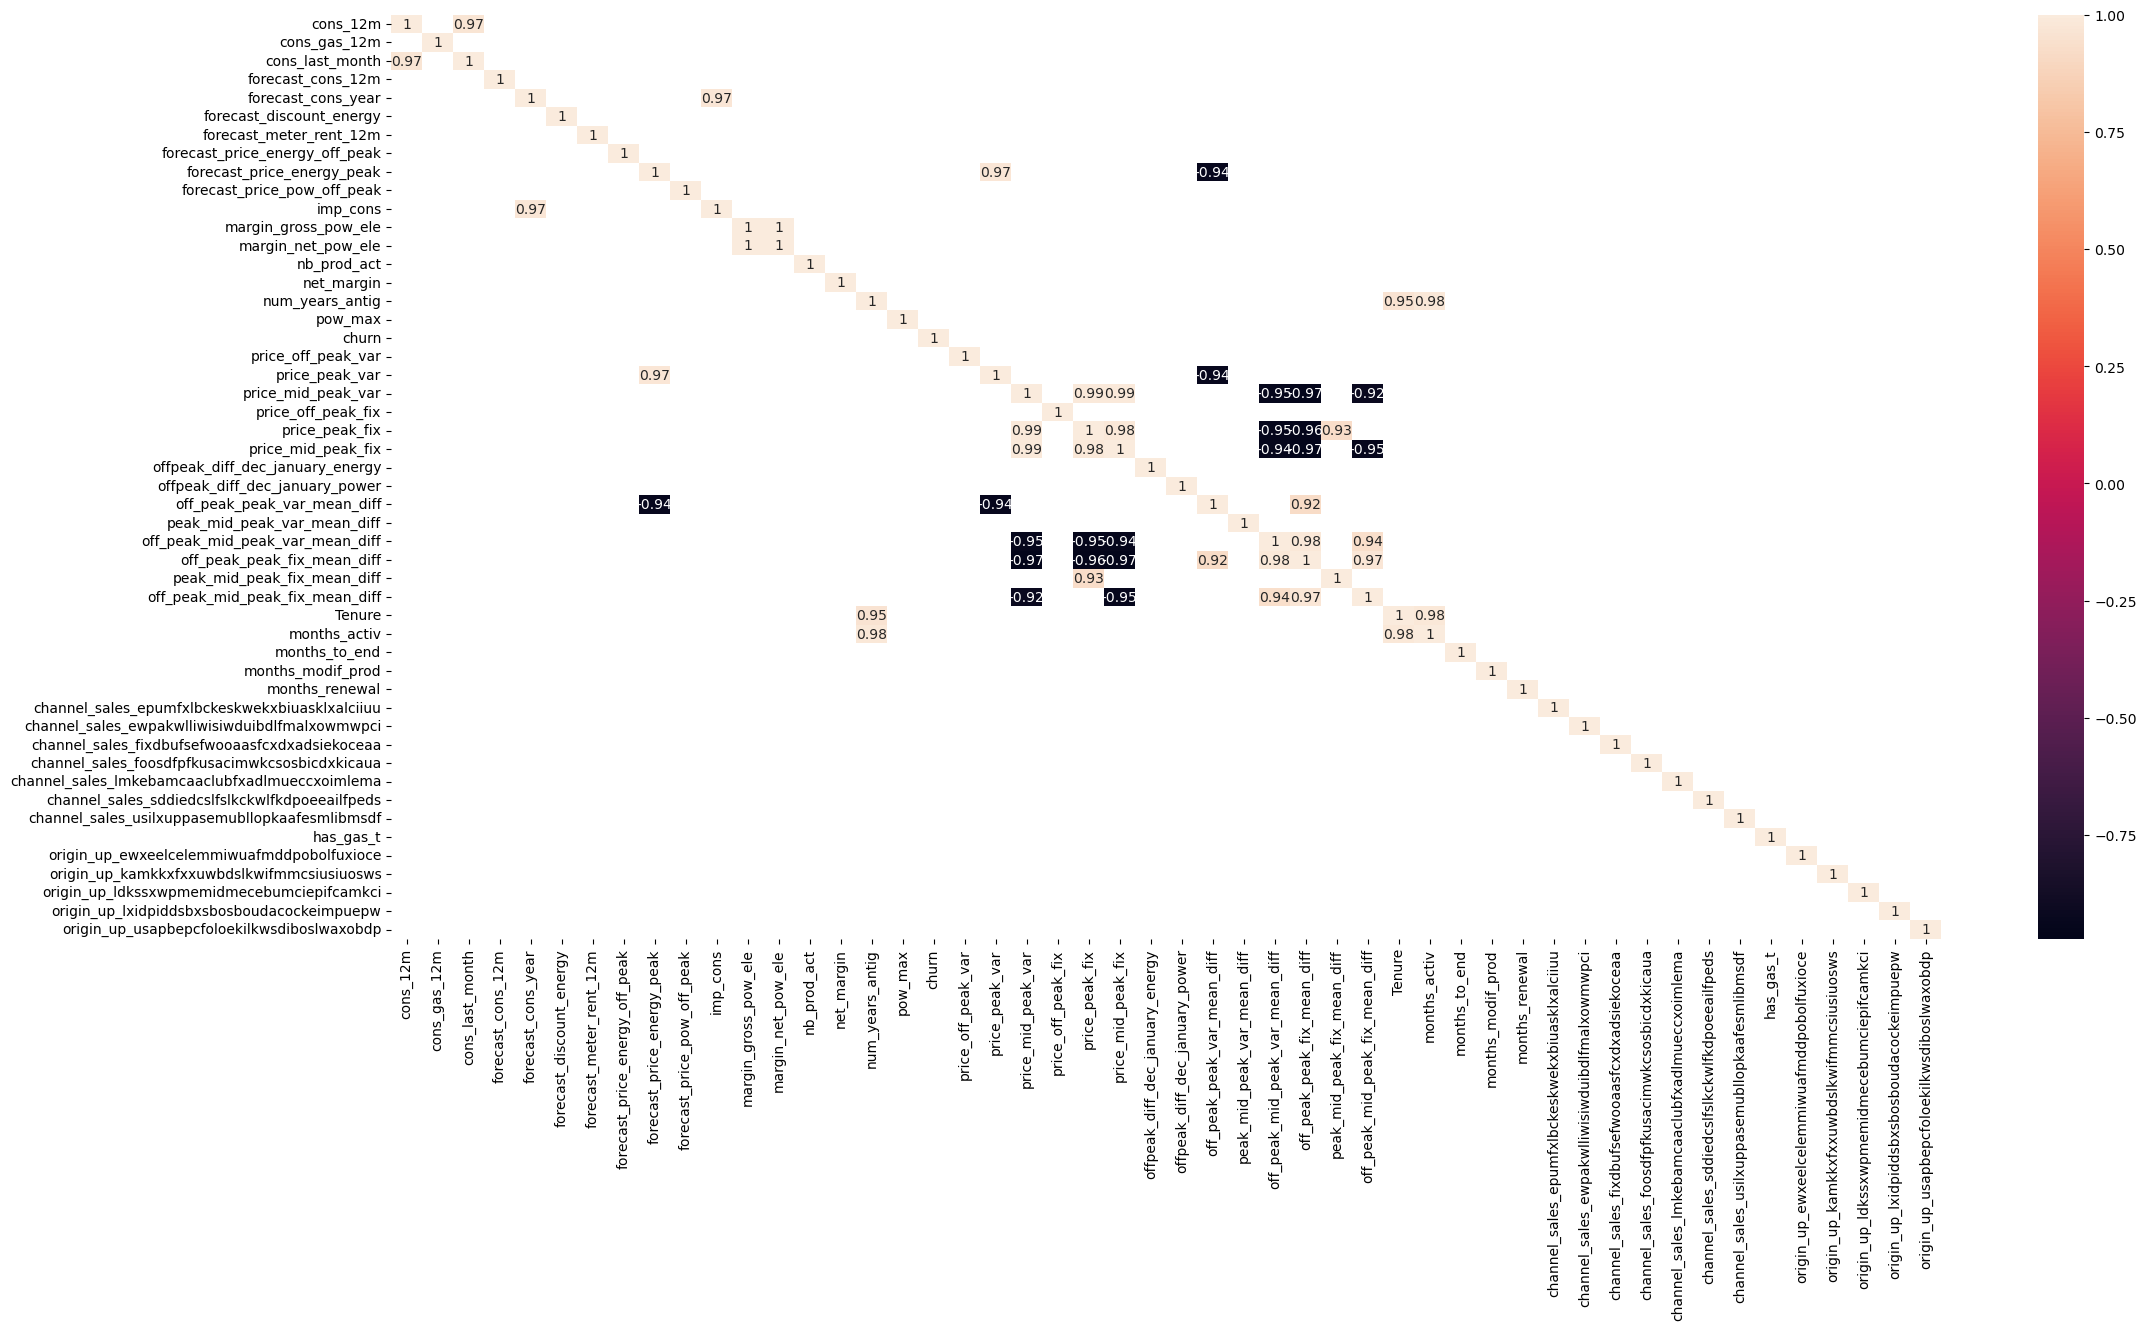

In [170]:
#correlation
plt.figure(figsize=(25,12))
sns.heatmap(df1.corr()[((df1.corr() > 0.90) | (df1.corr() < -0.90))],annot=True,)

In [176]:
#for now we will leave the multicollinearity as it is

In [ ]:
# we will use pycaret first to check which model is giving the best performance

## Model Building

In [177]:
from pycaret.classification import *

In [178]:
m1 = setup(data=df1,target='churn',remove_multicollinearity=True,preprocess=True)

,Description,Value
0,Session id,971
1,Target,churn
2,Target type,Binary
3,Original data shape,"(56369, 50)"
4,Transformed data shape,"(56369, 38)"
5,Transformed train set shape,"(39458, 38)"
6,Transformed test set shape,"(16911, 38)"
7,Numeric features,49
8,Preprocess,True
9,Imputation type,simple


In [180]:
models_to_compare = ['lr', 'ada', 'xgboost', 'nb', 'knn', 'rf', 'dt', 'gbc']

best_model = compare_models(models_to_compare)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9874,0.9940,0.8729,0.9985,0.9315,0.9246,0.9271,1.9710
dt,Decision Tree Classifier,0.9855,0.9616,0.9318,0.9219,0.9267,0.9187,0.9188,0.4030
xgboost,Extreme Gradient Boosting,0.9549,0.9650,0.5514,0.9811,0.7057,0.6834,0.7169,1.7560
knn,K Neighbors Classifier,0.9074,0.9230,0.4068,0.5380,0.4630,0.4134,0.4184,0.6460
gbc,Gradient Boosting Classifier,0.9046,0.7473,0.0302,0.9150,0.0584,0.0525,0.1552,2.8150
ada,Ada Boost Classifier,0.9018,0.7003,0.0041,0.4388,0.0082,0.0064,0.0340,1.7270
lr,Logistic Regression,0.9015,0.6201,0.0026,0.3265,0.0051,0.0034,0.0198,2.8370
nb,Naive Bayes,0.8254,0.5972,0.1764,0.1572,0.1652,0.0688,0.0691,0.2050


Processing:   0%|          | 0/37 [00:00<?, ?it/s]

In [ ]:
#using tranformed data

In [181]:
m1 = setup(data=df2,target='churn',remove_multicollinearity=True,preprocess=True)

,Description,Value
0,Session id,7722
1,Target,churn
2,Target type,Binary
3,Original data shape,"(56369, 50)"
4,Transformed data shape,"(56369, 38)"
5,Transformed train set shape,"(39458, 38)"
6,Transformed test set shape,"(16911, 38)"
7,Numeric features,49
8,Rows with missing values,0.6%
9,Preprocess,True


In [182]:
models_to_compare = ['lr', 'ada', 'xgboost', 'nb', 'knn', 'rf', 'dt', 'gbc']

best_model = compare_models(models_to_compare)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9891,0.9926,0.8895,0.9988,0.9409,0.9349,0.9369,1.8380
dt,Decision Tree Classifier,0.9872,0.9638,0.9347,0.9347,0.9347,0.9276,0.9276,0.2830
xgboost,Extreme Gradient Boosting,0.9572,0.9674,0.5770,0.9779,0.7255,0.7040,0.7330,1.6680
knn,K Neighbors Classifier,0.9114,0.9294,0.4329,0.5632,0.4888,0.4412,0.4462,0.5450
gbc,Gradient Boosting Classifier,0.9044,0.7531,0.0281,0.9295,0.0545,0.0490,0.1505,2.6200
lr,Logistic Regression,0.9017,0.6614,0.0013,0.0905,0.0025,0.0018,0.0066,2.0360
ada,Ada Boost Classifier,0.9016,0.7070,0.0059,0.4428,0.0117,0.0089,0.0407,0.7290
nb,Naive Bayes,0.1022,0.6097,0.9995,0.0985,0.1793,0.0008,0.0185,0.1400


Processing:   0%|          | 0/37 [00:00<?, ?it/s]

#### we are getting the better results for random forrest classifier


We are using a Random Forest classifier in this example. A Random Forest sits within the category of ensemble algorithms because internally the Forest refers to a collection of Decision Trees which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an ensemble algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm.

With ensemble methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging.

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
It is able to handle non-linear parameters better than linear based models
On the flip side, some disadvantages of the random forest classifier include:

The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
Training time can be longer due to the increased complexity and size of thee ensemble


# Selecting metric


First of all our target is imbalanced so accuracy is not a good measure.

Since our goal is to predict whether a customer will churn or not 

so we need our model to have high recall or sensitivity 

we should be able to predict all the customers that will actually churn so that we can take measures to prevent them from churning.

Also we can look at the f1 score as a combination of the recall and precsion

I will be more foccusing on the Recall thats the ability to predict all the positive class correctly

In [185]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56369 entries, 0 to 175144
Data columns (total 50 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   cons_12m                                        56369 non-null  int64  
 1   cons_gas_12m                                    56369 non-null  int64  
 2   cons_last_month                                 56369 non-null  int64  
 3   forecast_cons_12m                               56369 non-null  float64
 4   forecast_cons_year                              56369 non-null  int64  
 5   forecast_discount_energy                        56369 non-null  float64
 6   forecast_meter_rent_12m                         56369 non-null  float64
 7   forecast_price_energy_off_peak                  56369 non-null  float64
 8   forecast_price_energy_peak                      56369 non-null  float64
 9   forecast_price_pow_off_peak           

In [193]:
X = df1.drop(columns ='churn')
y = df1['churn']

xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=10)

In [192]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

def per_measures(model,test,pred):


    accuracy    =accuracy_score(test,pred)
    f1score     =f1_score(test,pred)
    recall      =recall_score(test,pred)
    precision   =precision_score(test,pred)
      # aic         =model.aic
      # reliability = cohen_kappa_score(test,pred)



    return (accuracy,recall,precision,f1score,)

def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)

In [195]:
rf = RandomForestClassifier(random_state=10)
rf.fit(xtrain,ytrain)
pred_tr = rf.predict(xtrain)
pred_tt = rf.predict(xtest)

In [196]:
update_performance('rf_df1_train',rf,ytrain,pred_tr)
update_performance('rf_df1_train',rf,ytest,pred_tt)

In [197]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,rf_df1_train,1.000000,1.000000,1.000000,1.000000
1,rf_df1_train,0.994536,0.948736,0.995455,0.971534


In [205]:
df2.dropna(inplace=True)

In [206]:
X = df2.drop(columns ='churn')
y = df2['churn']

xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=10)
rf = RandomForestClassifier(random_state=10)
rf.fit(xtrain,ytrain)
pred_tr = rf.predict(xtrain)
pred_tt = rf.predict(xtest)
update_performance('rf_df2_train',rf,ytrain,pred_tr)
update_performance('rf_df2_test',rf,ytest,pred_tt)

In [216]:
perf_score.iloc[1,0] = 'rf_df1_test'

In [217]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,rf_df1_train,1.000000,1.000000,1.000000,1.000000
1,rf_df1_test,0.994536,0.948736,0.995455,0.971534
2,rf_df2_train,0.999976,0.999760,1.000000,0.999880
3,rf_df2_test,0.996146,0.959490,1.000000,0.979326


so for transformed data  we are getting better results 

also our model is in overfit condition we will do regularization to make the model more generalized

from the intial point our model has good performance interms of recall ,precision and f1 score

In [219]:
rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [ 2, 4],

}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [220]:
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [221]:
rf = RandomForestClassifier(**grid_search.best_params_)

In [222]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [223]:
pred_tr = rf.predict(xtrain)
pred_tt = rf.predict(xtest)
update_performance('rf_df2_train_tuned',rf,ytrain,pred_tr)
update_performance('rf_df2_test_tuned',rf,ytest,pred_tt)

In [224]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,rf_df1_train,1.000000,1.000000,1.000000,1.000000
1,rf_df1_test,0.994536,0.948736,0.995455,0.971534
2,rf_df2_train,0.999976,0.999760,1.000000,0.999880
3,rf_df2_test,0.996146,0.959490,1.000000,0.979326
4,rf_df2_train_tuned,0.998525,0.985107,1.000000,0.992498
5,rf_df2_test_tuned,0.985798,0.850713,1.000000,0.919335


In [226]:
rf = RandomForestClassifier(max_depth= 50,
 min_samples_leaf= 3,
 min_samples_split= 7,
 n_estimators= 250)


In [228]:
rf.fit(xtrain,ytrain)
pred_tr = rf.predict(xtrain)
pred_tt = rf.predict(xtest)
update_performance('rf_df2_train_tuned_1',rf,ytrain,pred_tr)
update_performance('rf_df2_test_tuned_2',rf,ytest,pred_tt)

In [229]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,rf_df1_train,1.000000,1.000000,1.000000,1.000000
1,rf_df1_test,0.994536,0.948736,0.995455,0.971534
2,rf_df2_train,0.999976,0.999760,1.000000,0.999880
3,rf_df2_test,0.996146,0.959490,1.000000,0.979326
4,rf_df2_train_tuned,0.998525,0.985107,1.000000,0.992498
5,rf_df2_test_tuned,0.985798,0.850713,1.000000,0.919335
6,rf_df2_train_tuned_1,0.992958,0.928897,1.000000,0.963138
7,rf_df2_test_tuned_2,0.969740,0.681920,1.000000,0.810883


In [230]:
rf = RandomForestClassifier(max_depth= 50,
 min_samples_leaf= 2,
 min_samples_split= 4,
 n_estimators= 250)
rf.fit(xtrain,ytrain)
pred_tr = rf.predict(xtrain)
pred_tt = rf.predict(xtest)
update_performance('rf_df2_train_tuned_1',rf,ytrain,pred_tr)
update_performance('rf_df2_test_tuned_2',rf,ytest,pred_tt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,rf_df1_train,1.000000,1.000000,1.000000,1.000000
1,rf_df1_test,0.994536,0.948736,0.995455,0.971534
2,rf_df2_train,0.999976,0.999760,1.000000,0.999880
3,rf_df2_test,0.996146,0.959490,1.000000,0.979326
4,rf_df2_train_tuned,0.998525,0.985107,1.000000,0.992498
5,rf_df2_test_tuned,0.985798,0.850713,1.000000,0.919335
6,rf_df2_train_tuned_1,0.992958,0.928897,1.000000,0.963138
7,rf_df2_test_tuned_2,0.969740,0.681920,1.000000,0.810883
8,rf_df2_train_tuned_1,0.998501,0.984867,1.000000,0.992376
9,rf_df2_test_tuned_2,0.986726,0.860465,1.000000,0.925000


In [231]:
rf = RandomForestClassifier(max_depth= 50,
 min_samples_leaf= 2,
 min_samples_split= 4,
 n_estimators= 275)
rf.fit(xtrain,ytrain)
pred_tr = rf.predict(xtrain)
pred_tt = rf.predict(xtest)
update_performance('rf_df2_train_tuned_3',rf,ytrain,pred_tr)
update_performance('rf_df2_test_tuned_3',rf,ytest,pred_tt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,rf_df1_train,1.000000,1.000000,1.000000,1.000000
1,rf_df1_test,0.994536,0.948736,0.995455,0.971534
2,rf_df2_train,0.999976,0.999760,1.000000,0.999880
3,rf_df2_test,0.996146,0.959490,1.000000,0.979326
4,rf_df2_train_tuned,0.998525,0.985107,1.000000,0.992498
5,rf_df2_test_tuned,0.985798,0.850713,1.000000,0.919335
6,rf_df2_train_tuned_1,0.992958,0.928897,1.000000,0.963138
7,rf_df2_test_tuned_2,0.969740,0.681920,1.000000,0.810883
8,rf_df2_train_tuned_1,0.998501,0.984867,1.000000,0.992376
9,rf_df2_test_tuned_2,0.986726,0.860465,1.000000,0.925000


 from trying out regularization to make our model more generalized we got an recall of 0.86 s we will select it as the final model

In [233]:
rf = RandomForestClassifier(max_depth= 50,
 min_samples_leaf= 2,
 min_samples_split= 4,
 n_estimators= 250)
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       n_estimators=250, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
pred_tr = rf.predict(xtrain)
pred_tt = rf.predict(xtest)

In [235]:
print(classification_report(ytrain,pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37870
           1       1.00      0.99      0.99      4163

    accuracy                           1.00     42033
   macro avg       1.00      0.99      1.00     42033
weighted avg       1.00      1.00      1.00     42033



In [236]:
print(classification_report(ytest,pred_tt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12679
           1       1.00      0.86      0.92      1333

    accuracy                           0.99     14012
   macro avg       0.99      0.93      0.96     14012
weighted avg       0.99      0.99      0.99     14012



In [237]:
# we have done regularization to make our model come out off overfit condition 
# we have a recall of 0.86 for test data and f1-score of 0.92 
# we were able to predict 86% of customers who had churned correctly
# by doing further regularization we can improve the performance of our model

<AxesSubplot:>

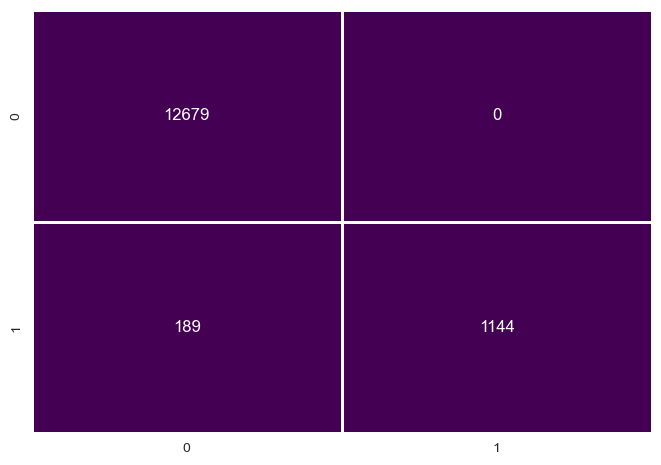

In [246]:
cm = confusion_matrix(ytest,pred_tt)
sns.heatmap(cm,annot=True,cbar=False,linewidths=.75,vmax=0,vmin=0,fmt='d',cmap='viridis')

In [255]:
fpr,tpr,th = roc_curve(ytest,rf.predict_proba(xtest)[:,1])

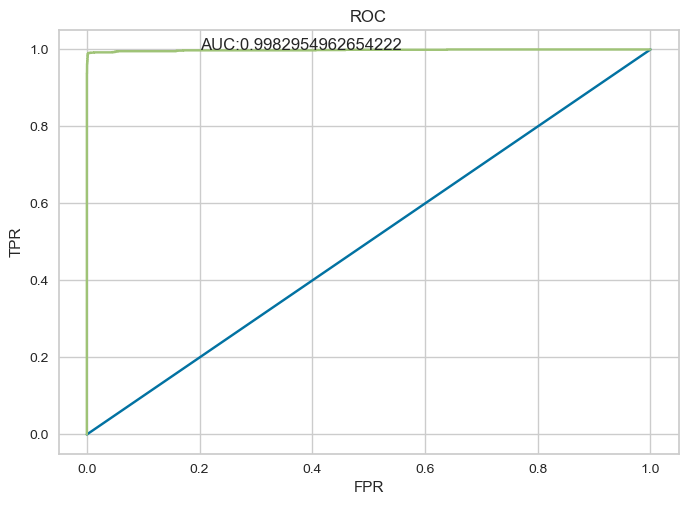

In [256]:
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.text(0.2,1.0,'AUC:'+str(roc_auc_score(ytest,rf.predict_proba(xtest)[:,1])))
plt.show()

array([0.        , 0.        , 0.        , ..., 0.97365723, 0.97413045,
       1.        ])

In [262]:
pd.set_option('display.float_format', '{:.5f}'.format)


In [273]:
rf_imp = pd.DataFrame({'features':xtrain.columns,'importance':rf.feature_importances_})

In [274]:

rf_imp.sort_values(by ='importance',inplace=True,ascending=False)

In [275]:
rf_imp

,features,importance
0,cons_12m,0.06122
14,net_margin,0.05857
6,forecast_meter_rent_12m,0.05823
3,forecast_cons_12m,0.05420
11,margin_gross_pow_ele,0.05367
12,margin_net_pow_ele,0.05188
16,pow_max,0.04214
25,off_peak_peak_var_mean_diff,0.04203
2,cons_last_month,0.04077
27,off_peak_mid_peak_var_mean_diff,0.03970


In [276]:
#aagin train model based on feature_imp

In [277]:
rf_imp[rf_imp['importance'] > 0.0015]['features']

0                                           cons_12m
14                                        net_margin
6                            forecast_meter_rent_12m
3                                  forecast_cons_12m
11                              margin_gross_pow_ele
12                                margin_net_pow_ele
16                                           pow_max
25                       off_peak_peak_var_mean_diff
2                                    cons_last_month
27                   off_peak_mid_peak_var_mean_diff
23                   offpeak_diff_dec_january_energy
34                                 months_modif_prod
32                                      months_activ
10                                          imp_cons
4                                 forecast_cons_year
7                     forecast_price_energy_off_peak
31                                            Tenure
28                       off_peak_peak_fix_mean_diff
33                                     months_

In [278]:
a =rf_imp[rf_imp['importance'] > 0.0015]['features']

In [280]:
xtrain1 = xtrain[a]
xtest1 = xtest[a]

In [281]:
rf.fit(xtrain1,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       n_estimators=250, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [282]:
pred_tr = rf.predict(xtrain1)
pred_tt = rf.predict(xtest1)

In [284]:
print(classification_report(ytrain,pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37870
           1       1.00      0.99      0.99      4163

    accuracy                           1.00     42033
   macro avg       1.00      0.99      1.00     42033
weighted avg       1.00      1.00      1.00     42033



In [283]:
print(classification_report(ytest,pred_tt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12679
           1       1.00      0.86      0.92      1333

    accuracy                           0.99     14012
   macro avg       0.99      0.93      0.96     14012
weighted avg       0.99      0.99      0.99     14012



## So after removing the features with close to 0 importance we are still getting same results

In [290]:
rf_imp = pd.DataFrame({'features':xtrain1.columns,'importance':rf.feature_importances_})
rf_imp.sort_values(by ='importance',inplace=True,ascending=False)

In [291]:
rf_imp

,features,importance
0,cons_12m,0.06043
1,net_margin,0.05837
2,forecast_meter_rent_12m,0.05781
3,forecast_cons_12m,0.05470
5,margin_net_pow_ele,0.05333
4,margin_gross_pow_ele,0.05295
6,pow_max,0.04119
8,cons_last_month,0.04113
7,off_peak_peak_var_mean_diff,0.04082
10,offpeak_diff_dec_january_energy,0.04012


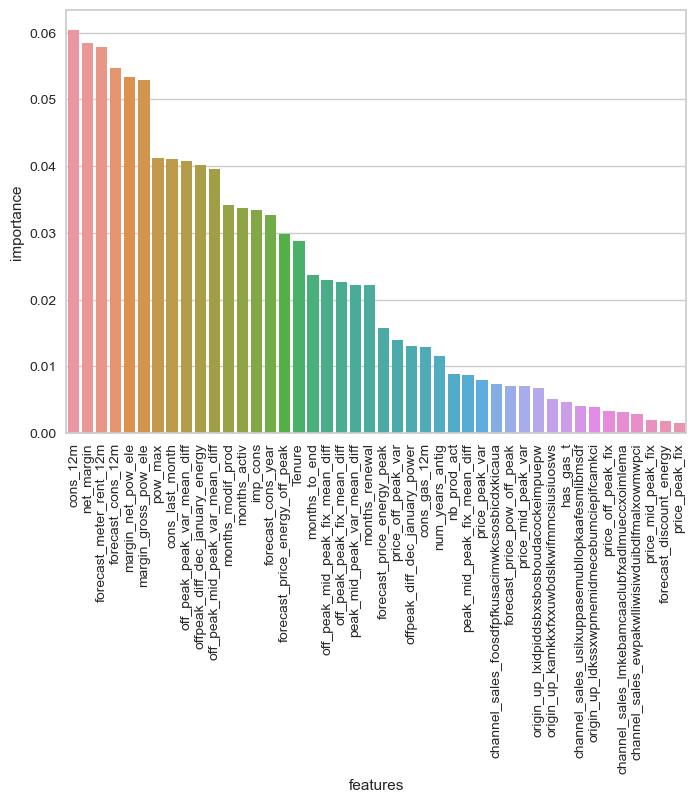

In [295]:
sns.barplot(rf_imp['features'],rf_imp['importance'])
plt.xticks(rotation=90)
plt.show()

In [297]:
rf_imp[:10]

,features,importance
0,cons_12m,0.06043
1,net_margin,0.05837
2,forecast_meter_rent_12m,0.05781
3,forecast_cons_12m,0.05470
5,margin_net_pow_ele,0.05333
4,margin_gross_pow_ele,0.05295
6,pow_max,0.04119
8,cons_last_month,0.04113
7,off_peak_peak_var_mean_diff,0.04082
10,offpeak_diff_dec_january_energy,0.04012


Based on feature importance 10  features are 
consumption 12 months:
this is a clear indicator whether the customer will churn or not 
out of top 10 features the newly engineered features like 
off_peak_peak_var_mean_diff	,offpeak_diff_dec_january_energy
 are also strong indicators of churn
 The last observation is important because this relates back to our original hypothesis:

 Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.